In [2]:
#enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np 
import pandas as pd 

import seaborn as sns #data visualization
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

from yellowbrick.classifier import ClassificationReport #model performance visualization

In [3]:
news_reliable = pd.read_csv('./reliable_FE.csv', sep=',')
news_unreliable = pd.read_csv('./unreliable_FE.csv', sep=',')

In [4]:
news_reliable.head(n=3)

,Unnamed: 0,Statement,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,% of Positive Words,% of Negative Words,# of Unique Wrods/Terms,# of Misspelled Words,# of Causation Terms
0,0,Nearly 300 people have been infected in the co...,85.0,15.0,4.0,5.0,2.0,15.0,5.666667,0.0,25.0,0.0,0.000000,13.333333,13.0,0.0,0.0
1,1,"A BBC team travels into Hubei province, where ...",72.0,13.0,1.0,6.0,2.0,13.0,5.538462,0.0,0.0,0.0,0.000000,7.692308,13.0,0.0,0.0
2,2,"Australian scientists say it is a ""significant...",89.0,15.0,3.0,4.0,2.0,15.0,5.933333,0.0,0.0,0.0,13.333333,0.000000,15.0,0.0,0.0


In [10]:
news_reliable.describe()
news_unreliable.describe()

,Unnamed: 0,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,% of Positive Words,% of Negative Words,# of Unique Wrods/Terms,# of Misspelled Words,# of Causation Terms
count,100.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.0,97.000000
mean,49.500000,110.144330,21.865979,3.907216,7.762887,2.144330,19.103093,5.084145,0.020619,2.347815,0.0,1.243507,6.531943,18.896907,0.0,0.020619
std,29.011492,44.655624,8.955479,1.826212,3.757695,0.478489,7.489825,0.552233,0.203069,6.814128,0.0,2.760537,5.273969,6.679391,0.0,0.142842
min,0.000000,48.000000,8.000000,1.000000,2.000000,1.000000,7.000000,3.900000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,0.0,0.000000
25%,24.750000,80.000000,16.000000,2.000000,5.000000,2.000000,15.000000,4.717949,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,0.0,0.000000
50%,49.500000,87.000000,18.000000,4.000000,7.000000,2.000000,17.000000,5.000000,0.000000,0.000000,0.0,0.000000,6.666667,16.000000,0.0,0.000000
75%,74.250000,140.000000,29.000000,5.000000,10.000000,2.000000,21.000000,5.533333,0.000000,0.000000,0.0,0.000000,10.000000,23.000000,0.0,0.000000
max,99.000000,219.000000,45.000000,8.000000,19.000000,4.000000,45.000000,7.166667,2.000000,25.000000,0.0,13.333333,20.000000,37.000000,0.0,1.000000


,Unnamed: 0,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,% of Positive Words,% of Negative Words,# of Unique Wrods/Terms,# of Misspelled Words,# of Causation Terms
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0
mean,49.500000,147.040000,28.570000,5.100000,10.270000,2.320000,21.423333,5.155646,0.040000,1.363492,0.0,1.409865,5.268137,23.660000,0.0,0.0
std,29.011492,54.924175,10.900148,2.414184,4.545738,0.763829,10.805323,0.518614,0.196946,5.566795,0.0,3.915523,4.121175,7.992699,0.0,0.0
min,0.000000,26.000000,5.000000,1.000000,1.000000,1.000000,3.500000,3.900000,0.000000,0.000000,0.0,0.000000,0.000000,5.000000,0.0,0.0
25%,24.750000,113.250000,22.000000,3.000000,8.000000,2.000000,12.125000,4.816761,0.000000,0.000000,0.0,0.000000,2.127660,18.750000,0.0,0.0
50%,49.500000,150.000000,28.000000,5.000000,10.000000,2.000000,22.000000,5.166667,0.000000,0.000000,0.0,0.000000,5.000000,24.000000,0.0,0.0
75%,74.250000,195.750000,38.000000,7.000000,13.000000,3.000000,28.500000,5.486111,0.000000,0.000000,0.0,0.000000,7.478632,30.250000,0.0,0.0
max,99.000000,223.000000,47.000000,13.000000,22.000000,4.000000,43.000000,6.242424,1.000000,33.333333,0.0,28.571429,16.666667,38.000000,0.0,0.0


In [6]:
news_reliable['reliability'] = '1'
news_unreliable['reliability'] = '0'

In [9]:
news_compare = pd.concat([news_reliable, news_unreliable], axis=0)
news_compare.dtypes

Unnamed: 0                             int64
Statement                             object
# of Characters                      float64
# of Words                           float64
# of Verbs                           float64
# of Noun                            float64
# of Sentence                        float64
Average # of Words per Sentence      float64
Average # of Characters per Words    float64
# of Question Marks                  float64
% of Subjective Verbs                float64
% of Passive Voice                   float64
% of Positive Words                  float64
% of Negative Words                  float64
# of Unique Wrods/Terms              float64
# of Misspelled Words                float64
# of Causation Terms                 float64
reliability                           object
dtype: object

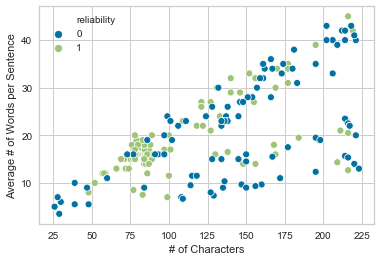

In [13]:
sns.scatterplot(x="# of Characters", y="Average # of Words per Sentence", hue="reliability", data=news_compare)